In [2]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
import yfinance as yf

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib.ticker import PercentFormatter

[*********************100%***********************]  1 of 1 completed
<ipython-input-7-4715ddf2f1df>:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  variacao = float(petr['Close'].iloc[preco] / petr['Close'].iloc[preco - 1])
<ipython-input-7-4715ddf2f1df>:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if float(port_atualizado) >= (2*float(petr['Close'].iloc[preco])):
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


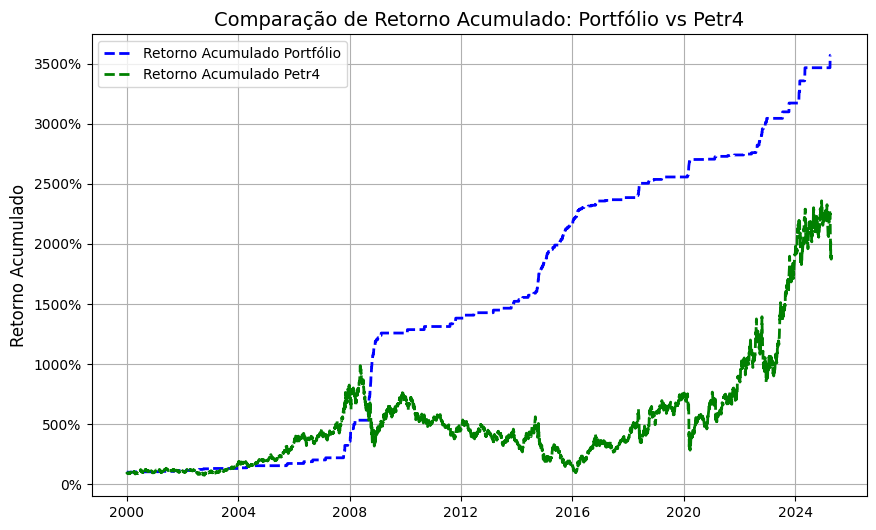

In [7]:
# Inicializando variáveis
petr = yf.download("PETR4.SA", period='max')
port_inicial = 1000
num_acoes = 0
port_atualizado = port_inicial  # Inicializando o valor de port_atualizado

# Criando uma lista para armazenar o valor de port_atualizado a cada iteração
port_values = [port_inicial]

# Loop para calcular o valor do portfólio ao longo do tempo
for preco in range(1, len(petr['Close'])):
    # Calculando a variação percentual entre o preço atual e o preço anterior
    variacao = float(petr['Close'].iloc[preco] / petr['Close'].iloc[preco - 1])
    #Obs: Cálculo do Valor do Portfólio já considera corretagem para operações com ações na B3.
    if variacao > 1.075:  # Preço subiu mais de 7,5%, venda
        if num_acoes > 5:
            num_acoes -= 5
            port_atualizado = port_atualizado +5*petr['Close'].iloc[preco]+num_acoes*petr['Close'].iloc[preco]-(0.005*5*petr['Close'].iloc[preco])
            port_values.append(port_atualizado)

    elif variacao < 0.95:  # Preço caiu mais de 5,0%, compra
        if float(port_atualizado) >= (2*float(petr['Close'].iloc[preco])):
            num_acoes += 2
            port_atualizado = port_atualizado -petr['Close'].iloc[preco]*2+num_acoes*petr['Close'].iloc[preco]-(0.005*2*petr['Close'].iloc[preco])
            port_values.append(port_atualizado)
    else:  # Caso contrário, mantém o valor do portfólio
        port_values.append(port_atualizado)

# Convertendo o histórico de portfólio para um DataFrame e calculando o retorno acumulado
port_values_df = pd.DataFrame(port_values, columns=['Portfólio'])
port_values_df.index = petr.index[:len(port_values_df)]  # Alinha os índices com os preços
port_values_df = port_values_df.pct_change().fillna(0)  # Calculando a variação percentual
port_values_df_retornos = (1 + port_values_df).cumprod()  # Calculando o retorno acumulado

# Calculando o retorno acumulado do preço de fechamento da ação
petr_df = pd.DataFrame(petr['Close'])
petr_df.columns = ['Close']
# Calcular a variação percentual diária
petr_df['pct_change'] = petr_df['Close'].pct_change().fillna(0)

# Calcular o retorno acumulado DE PETR4
petr_df_retornos = (1 + petr_df['pct_change']).cumprod()  # Multiplicando (1 + pct_change) acumulado

# Plotando ambos os retornos acumulados no mesmo gráfico
plt.figure(figsize=(10, 6))

# Plotando o retorno acumulado do portfólio
plt.plot(port_values_df_retornos, label="Retorno Acumulado Portfólio", color='blue', linestyle='--', linewidth=2);

# Plotando o retorno acumulado de Petr4
plt.plot(petr_df_retornos, label="Retorno Acumulado Petr4", color='green', linestyle='--', linewidth=2);

# Adicionando título e rótulos aos eixos
plt.title('Comparação de Retorno Acumulado: Portfólio vs Petr4', fontsize=14)
#plt.xlabel('Períodos')
plt.ylabel('Retorno Acumulado', fontsize=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.show()

<ipython-input-12-92e5deb7ff94>:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  variacao = float(dados['Close'].iloc[i] / dados['Close'].iloc[i - 1])
<ipython-input-12-92e5deb7ff94>:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if float(port_atualizado) >= (2 * float(preco_atual)):
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)
<ipython-input-12-92e5deb7ff94>:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  variacao = float(dados['Close'].iloc[i] / dados['Close'].iloc[i - 1])
<ipython-input-12-92e5d

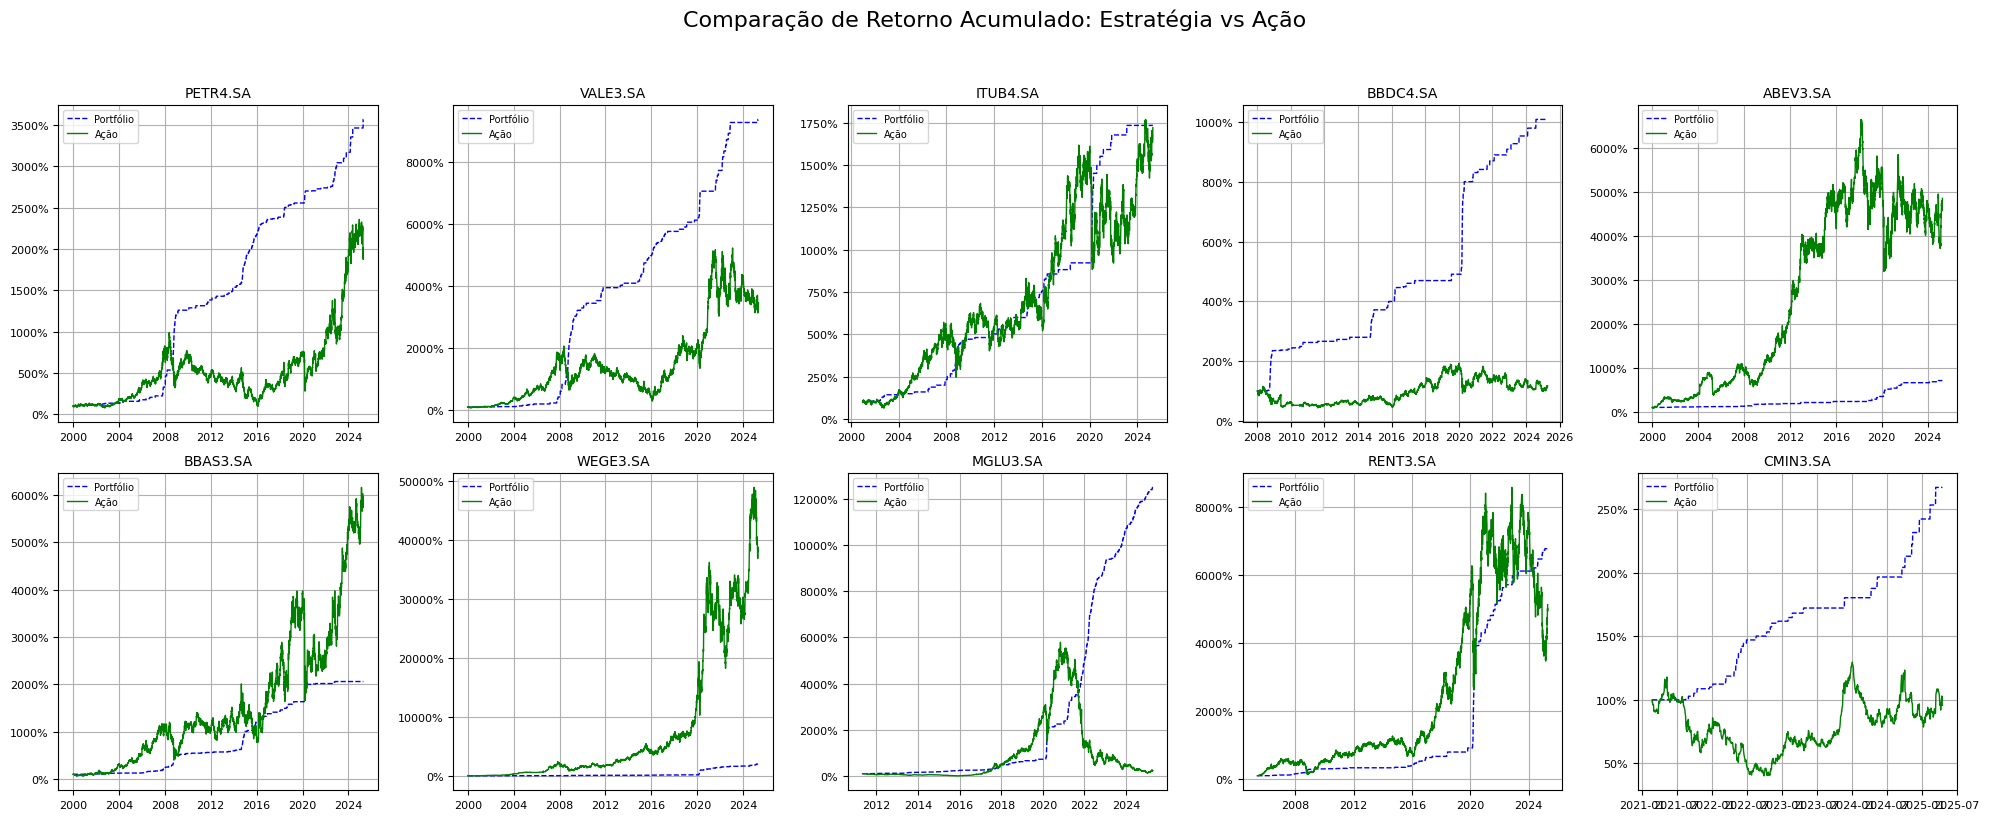

In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Lista de ações para aplicar a estratégia
lista_acoes = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "ABEV3.SA",
               "BBAS3.SA", "WEGE3.SA", "MGLU3.SA", "RENT3.SA", "CMIN3.SA"]

# Parâmetros iniciais
port_inicial = 1000

# Criando uma figura única para todos os gráficos
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 2 linhas, 5 colunas
axs = axs.flatten()  # Facilita iteração com índice

# Loop para cada ativo e gráfico
for idx, ticker in enumerate(lista_acoes):
    # Baixando os dados históricos da ação
    dados = yf.download(ticker, period='max', progress=False)

    # Inicializando variáveis
    port_atualizado = port_inicial
    num_acoes = 0
    port_values = [port_inicial]

    # Estratégia de compra e venda
    for i in range(1, len(dados['Close'])):
        variacao = float(dados['Close'].iloc[i] / dados['Close'].iloc[i - 1])
        preco_atual = dados['Close'].iloc[i]

        if variacao > 1.075:  # Venda
            if num_acoes > 5:
                num_acoes -= 5
                port_atualizado = port_atualizado + 5 * preco_atual + num_acoes * preco_atual - (0.005 * 5 * preco_atual)

        elif variacao < 0.95:  # Compra
            if float(port_atualizado) >= (2 * float(preco_atual)):
                num_acoes += 2
                port_atualizado = port_atualizado - 2 * preco_atual + num_acoes * preco_atual - (0.005 * 2 * preco_atual)

        # Caso contrário, mantém o valor do portfólio
        port_values.append(port_atualizado)

    # Convertendo os valores do portfólio para DataFrame
    port_df = pd.DataFrame(port_values, columns=['Portfólio'])
    port_df.index = dados.index[:len(port_values)]
    port_df_pct = port_df.pct_change().fillna(0)
    port_ret_acumulado = (1 + port_df_pct).cumprod()

    # Retorno acumulado da ação
    dados['pct_change'] = dados['Close'].pct_change().fillna(0)
    retorno_acumulado_acao = (1 + dados['pct_change']).cumprod()

    # Plotando no subplot correspondente
    ax = axs[idx]
    ax.plot(port_ret_acumulado, label='Portfólio', color='blue', linestyle='--', linewidth=1)
    ax.plot(retorno_acumulado_acao, label='Ação', color='green', linestyle='-', linewidth=1)
    ax.set_title(f'{ticker}', fontsize=10)
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.tick_params(labelsize=8)
    ax.grid(True)
    ax.legend(fontsize=7, loc='upper left')

# Ajustando layout
plt.tight_layout()
plt.suptitle("Comparação de Retorno Acumulado: Estratégia vs Ação", fontsize=16, y=1.02)
plt.subplots_adjust(top=0.90)
plt.show()